Load numpy arrays with patches from 10 cities and create U-Net model based on that

In [ ]:
#install packages
!pip install patchify
!pip install segmentation_models
!pip install focal-loss

In [2]:
import os
import numpy as np

In [3]:
# Connecting to the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


get the data from drive

In [4]:
def get_chips_from_drive(city, chips_folder_name):
  location_image_chips = os.path.join(dir, city, chips_folder_name, "image_chips_balanced.npy")
  loaded_image = np.load(location_image_chips)
  location_image_pugs = os.path.join(dir, city, chips_folder_name, "parks_chips_balanced.npy")
  loaded_pugs = np.load(location_image_pugs)
  return loaded_image, loaded_pugs

In [5]:
dir = #location of main folder
chips_folder_name = "3_chips_10_r_nir_ndvi"

image_array_amsterdam, park_array_amsterdam = get_chips_from_drive("Amsterdam", chips_folder_name)
image_array_buffalo, park_array_buffalo = get_chips_from_drive("Buffalo", chips_folder_name)
image_array_dhaka, park_array_dhaka = get_chips_from_drive("Dhaka", chips_folder_name)
image_array_dublin, park_array_dublin = get_chips_from_drive("Dublin", chips_folder_name)
image_array_ghent, park_array_ghent = get_chips_from_drive("Ghent", chips_folder_name)
image_array_london, park_array_london = get_chips_from_drive("London", chips_folder_name)
image_array_manchester, park_array_manchester = get_chips_from_drive("Manchester", chips_folder_name)
image_array_philadelphia, park_array_philadelphia = get_chips_from_drive("Philadelphia", chips_folder_name)
image_array_seattle, park_array_seattle = get_chips_from_drive("Seattle", chips_folder_name)
image_array_vancouver, park_array_vancouver = get_chips_from_drive("Vancouver", chips_folder_name)

In [6]:
print("amsterdam image - ", image_array_amsterdam.shape, "park - ", park_array_amsterdam.shape)
print("buffalo image - ", image_array_buffalo.shape, "park - ", park_array_buffalo.shape)
print("dhaka image - ", image_array_dhaka.shape, "park - ", park_array_dhaka.shape )
print("dublin image - ", image_array_dublin.shape, "park - ", park_array_dublin.shape )
print("ghent image - ", image_array_ghent.shape, "park - ", park_array_ghent.shape )
print("london image - ", image_array_london.shape, "park - ", park_array_london.shape)
print("manchester image - ", image_array_manchester.shape, "park - ", park_array_manchester.shape)
print("philadelphia image - ", image_array_philadelphia.shape, "park - ", park_array_philadelphia.shape)
print("seattle image - ", image_array_seattle.shape, "park - ", park_array_seattle.shape)
print("vancouver image - ", image_array_vancouver.shape, "park - ", park_array_vancouver.shape)

amsterdam image -  (723, 256, 256, 3) park -  (723, 256, 256, 1)
buffalo image -  (604, 256, 256, 3) park -  (604, 256, 256, 1)
dhaka image -  (34, 256, 256, 3) park -  (34, 256, 256, 1)
dublin image -  (712, 256, 256, 3) park -  (712, 256, 256, 1)
ghent image -  (435, 256, 256, 3) park -  (435, 256, 256, 1)
london image -  (1060, 256, 256, 3) park -  (1060, 256, 256, 1)
manchester image -  (1100, 256, 256, 3) park -  (1100, 256, 256, 1)
philadelphia image -  (1107, 256, 256, 3) park -  (1107, 256, 256, 1)
seattle image -  (812, 256, 256, 3) park -  (812, 256, 256, 1)
vancouver image -  (429, 256, 256, 3) park -  (429, 256, 256, 1)


merge into one numpy array

In [7]:
image_dataset = np.concatenate((image_array_amsterdam, image_array_buffalo, image_array_dhaka, image_array_dublin, image_array_ghent, image_array_london,
                                image_array_manchester,image_array_philadelphia,  image_array_seattle, image_array_vancouver), axis=0)

park_dataset = np.concatenate((park_array_amsterdam, park_array_buffalo, park_array_dhaka, park_array_dublin, park_array_ghent, park_array_london,
                               park_array_manchester,park_array_philadelphia,  park_array_seattle, park_array_vancouver), axis=0)

In [8]:
del image_array_amsterdam, image_array_buffalo, image_array_dhaka, image_array_dublin, image_array_ghent, image_array_london, image_array_manchester,image_array_philadelphia,  image_array_seattle, image_array_vancouver
del park_array_amsterdam, park_array_buffalo, park_array_dhaka, park_array_dublin, park_array_ghent, park_array_london, park_array_manchester,park_array_philadelphia, park_array_seattle, park_array_vancouver

In [9]:
import random
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


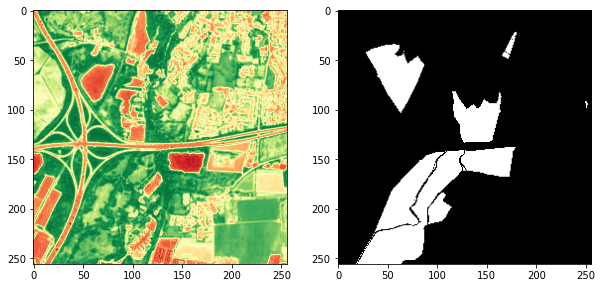

In [11]:
# check whether the cropped images match

# generate random number
image_number = random.randint(0, len(image_dataset)-1)
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.subplot(121)
plt.imshow(image_dataset[image_number,:,:,2], cmap='RdYlGn')

# plot parks - white is park
plt.subplot(122)
plt.imshow(park_dataset[image_number,:,:,0], cmap='gray')
plt.show()

In [12]:
image_dataset[image_dataset > 1] = 1  # replace some wired values like 1.000001 with 1
print("Image data shape is: ", image_dataset.shape)
print("Park data shape is: ", park_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Min pixel value in image is: ", image_dataset.min())
print("Labels in the mask are : ", np.unique(park_dataset))
print("Number of park pixels: ", np.count_nonzero(park_dataset == 1))
print("Number of no-park pixels: ", np.count_nonzero(park_dataset == 0))
print("Percentage of park: ", np.count_nonzero(park_dataset == 1)/(np.count_nonzero(park_dataset == 1)+np.count_nonzero(park_dataset == 0)))

Image data shape is:  (7016, 256, 256, 3)
Park data shape is:  (7016, 256, 256, 1)
Max pixel value in image is:  1.0
Min pixel value in image is:  0.0
Labels in the mask are :  [0. 1.]
Number of park pixels:  87309749
Number of no-park pixels:  372490827
Percentage of park:  0.18988612358763118


prepering data for modelling

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_dataset, park_dataset, 
                                                     test_size = 0.2, random_state = 42)

In [14]:
_, rowSize, colSize, nBands = X_train.shape

In [15]:
print(X_train.shape)
print(y_train.shape)

(5612, 256, 256, 3)
(5612, 256, 256, 1)


In [16]:
del image_dataset, park_dataset

data augumentation

In [17]:
seed=24
from keras.preprocessing.image import ImageDataGenerator

img_data_gen_args = dict(rotation_range=45, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='reflect')

mask_data_gen_args = dict(rotation_range=45, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.1, horizontal_flip=True, vertical_flip=True, fill_mode='reflect',
                         preprocessing_function = lambda x: np.where(x > 0, 1, 0).astype(x.dtype)) 

In [18]:
# set the batch size of image generator
batch_size= 8

# image generator (X_train and X_test)
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_data_generator.fit(X_train, augment=True, seed=seed)

image_generator = image_data_generator.flow(X_train, seed=seed, batch_size=batch_size)
valid_img_generator = image_data_generator.flow(X_test, seed=seed, batch_size=batch_size) 

# mask generator (y_train and y_test)
mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_data_generator.fit(y_train, augment=True, seed=seed)

mask_generator = mask_data_generator.flow(y_train, seed=seed, batch_size=batch_size)
valid_mask_generator = mask_data_generator.flow(y_test, seed=seed, batch_size=batch_size)

In [19]:
# put image generator and mask generator together
def my_image_mask_generator(image_generator, mask_generator):
    train_generator = zip(image_generator, mask_generator)
    for (img, mask) in train_generator:
        yield (img, mask)

train_generator = my_image_mask_generator(image_generator, mask_generator)
validation_generator = my_image_mask_generator(valid_img_generator, valid_mask_generator)

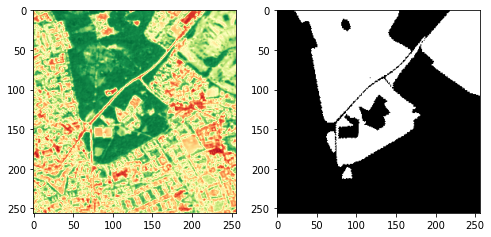

In [22]:
#check the augumentation 
x = image_generator.next()
y = mask_generator.next()
for i in range(0,1):
    plt.figure(figsize=(8, 4))
    image = x[i]
    mask = y[i]
    plt.subplot(121)
    plt.imshow(image[:,:,2], cmap='RdYlGn')
    
    plt.subplot(122)
    plt.imshow(mask[:,:,0], cmap = 'gray')
    plt.show()

build model

In [23]:
# define input shape
img_height = X_train.shape[1]
img_width  = X_train.shape[2]
img_bands = X_train.shape[3]

input_shape = (img_height, img_width, img_bands)
input_shape

(256, 256, 3)

In [24]:
import logging
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import concatenate, Input, UpSampling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [25]:
#code from https://github.com/jordancaraballo/nga-deep-learning/blob/master/scripts/core/unet.py

def unet_dropout(nclass=1, input_size=input_shape, weight_file=None,
                 maps=[64, 128, 256, 512, 1024]
                 ):
    """
    UNet network using dropout features.
    """
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(maps[0], (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(maps[0], (3, 3), activation='relu', padding='same')(c1)
    d2 = Dropout(0.3)(c1) #added by me - extra dropout, made bigger
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(maps[1], (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(maps[1], (3, 3), activation='relu', padding='same')(c2)
    d2 = Dropout(0.3)(c2) #added by me - extra dropout
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = Conv2D(maps[2], (3, 3), activation='relu', padding='same')(p2)
    c3 = Conv2D(maps[2], (3, 3), activation='relu', padding='same')(c3)
    d3 = Dropout(0.3)(c3) #added by me - extra dropout
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    c4 = Conv2D(maps[3], (3, 3), activation='relu', padding='same')(p3)
    c4 = Conv2D(maps[3], (3, 3), activation='relu', padding='same')(c4)
    d4 = Dropout(0.5)(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(d4)

    # Squeeze
    c5 = Conv2D(maps[4], (3, 3), activation='relu', padding='same')(p4)
    c5 = Conv2D(maps[4], (3, 3), activation='relu', padding='same')(c5)
    d5 = Dropout(0.5)(c5)

    # Decoder - add dropout, think about different activation
    u6 = UpSampling2D(size=(2, 2))(d5)
    m6 = concatenate([d4, u6], axis=3)
    c6 = Conv2D(maps[3], (3, 3), activation='relu', padding='same')(m6)
    c6 = Conv2D(maps[3], (3, 3), activation='relu', padding='same')(c6)
    d6 = Dropout(0.3)(c6) #added by me - extra dropout, made bigger

    u7 = UpSampling2D(size=(2, 2))(c6)
    m7 = concatenate([c3, u7], axis=3)
    c7 = Conv2D(maps[2], (3, 3), activation='relu', padding='same')(m7)
    c7 = Conv2D(maps[2], (3, 3), activation='relu', padding='same')(c7)
    d7 = Dropout(0.3)(c7) #added by me - extra dropout

    u8 = UpSampling2D(size=(2, 2))(c7)
    m8 = concatenate([c2, u8], axis=3)
    c8 = Conv2D(maps[1], (3, 3), activation='relu', padding='same')(m8)
    c8 = Conv2D(maps[1], (3, 3), activation='relu', padding='same')(c8)
    d8 = Dropout(0.3)(c8) #added by me - extra dropout

    u9 = UpSampling2D(size=(2, 2))(c8)
    m9 = concatenate([c1, u9], axis=3)
    c9 = Conv2D(maps[0], (3, 3), activation='relu', padding='same')(m9)
    c9 = Conv2D(maps[0], (3, 3), activation='relu', padding='same')(c9)
    d9 = Dropout(0.3)(c9) #added by me - extra dropout

    actv = 'sigmoid'

    conv10 = Conv2D(nclass, (1, 1), activation=actv)(c9)
    model = Model(inputs=inputs, outputs=conv10, name="UNetDropout")

    if weight_file:
        model.load_weights(weight_file)
    return model

train model with data augumentation

In [26]:
batch_size = 16
steps_per_epoch = len(X_train)//batch_size  # for generator
validation_steps = len(X_test)//batch_size  # for generator
print(steps_per_epoch, validation_steps)

350 87


In [27]:
# compile model
# use focal loss as loss function
import tensorflow as tf
from focal_loss import BinaryFocalLoss
import segmentation_models as sm

model = unet_dropout()
model.compile(optimizer=Adam(learning_rate = 1e-4), loss = sm.losses.binary_focal_dice_loss, 
               metrics=[sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'accuracy'])

model.summary()

Segmentation Models: using `keras` framework.
Model: "UNetDropout"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )         

In [28]:
history = model.fit(train_generator, validation_data = validation_generator,
                      batch_size = 16, steps_per_epoch = steps_per_epoch,
                      validation_steps = validation_steps, epochs = 50)

Epoch 1/50
350/350 [==============================] - 201s 510ms/step - loss: 0.6565 - iou_score: 0.3545 - f1-score: 0.5085 - precision: 0.4859 - recall: 0.5932 - accuracy: 0.7861 - val_loss: 0.6062 - val_iou_score: 0.4087 - val_f1-score: 0.5762 - val_precision: 0.5070 - val_recall: 0.6708 - val_accuracy: 0.8050
Epoch 2/50
350/350 [==============================] - 183s 524ms/step - loss: 0.5912 - iou_score: 0.4244 - f1-score: 0.5918 - precision: 0.5270 - recall: 0.6876 - accuracy: 0.8098 - val_loss: 0.5693 - val_iou_score: 0.4379 - val_f1-score: 0.6056 - val_precision: 0.5613 - val_recall: 0.6630 - val_accuracy: 0.8249
Epoch 3/50
350/350 [==============================] - 179s 511ms/step - loss: 0.5748 - iou_score: 0.4387 - f1-score: 0.6054 - precision: 0.5373 - recall: 0.7018 - accuracy: 0.8148 - val_loss: 0.5661 - val_iou_score: 0.4518 - val_f1-score: 0.6171 - val_precision: 0.5171 - val_recall: 0.7717 - val_accuracy: 0.8116
Epoch 4/50
350/350 [==============================] - 179s

In [29]:
from tensorflow import keras
model.save('location to save the model') #save model to drive

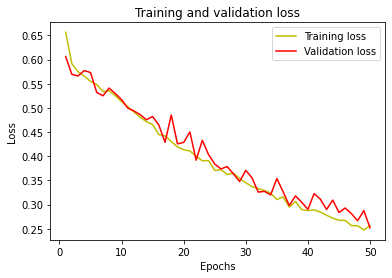

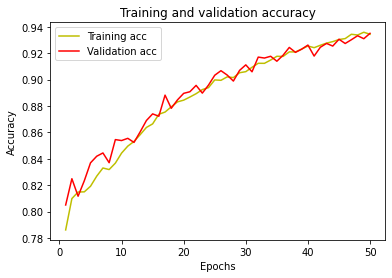

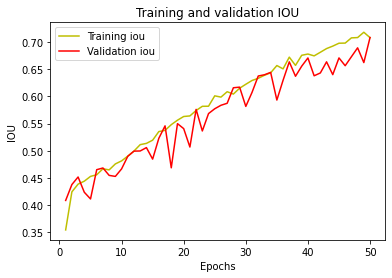

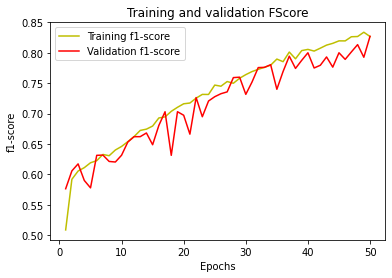

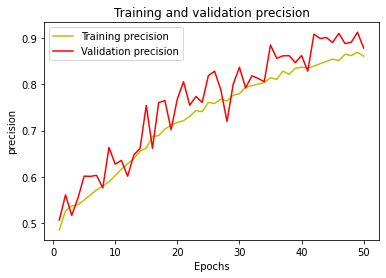

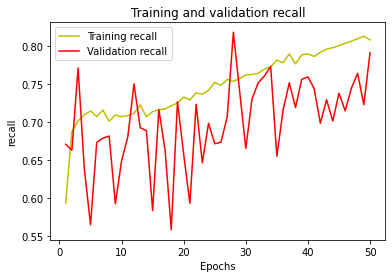

In [30]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

iou = history.history['iou_score']
val_iou = history.history['val_iou_score']
plt.plot(epochs, iou, 'y', label='Training iou')
plt.plot(epochs, val_iou, 'r', label='Validation iou')
plt.title('Training and validation IOU')
plt.xlabel('Epochs')
plt.ylabel('IOU')
plt.legend()
plt.show()

fscore = history.history['f1-score']
val_fscore = history.history['val_f1-score']
plt.plot(epochs, fscore, 'y', label='Training f1-score')
plt.plot(epochs, val_fscore, 'r', label='Validation f1-score')
plt.title('Training and validation FScore')
plt.xlabel('Epochs')
plt.ylabel('f1-score')
plt.legend()
plt.show()

precision = history.history['precision']
val_precision = history.history['val_precision']
plt.plot(epochs, precision, 'y', label='Training precision')
plt.plot(epochs, val_precision, 'r', label='Validation precision')
plt.title('Training and validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()


recall = history.history['recall']
val_recall = history.history['val_recall']
plt.plot(epochs, recall, 'y', label='Training recall')
plt.plot(epochs, val_recall, 'r', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()
plt.show()

In [31]:
#IoU
from tensorflow.keras.metrics import MeanIoU
#predict from model for all X_test
y_pred=model.predict(X_test)
# predictions are percentages, and we need 0 vs 1 so change to True/ False
y_pred_true_false = y_pred > 0.5
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_true_false, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.7437681


plot ground truth + predicted - use code down

(1, 256, 256, 3)
(256, 256)


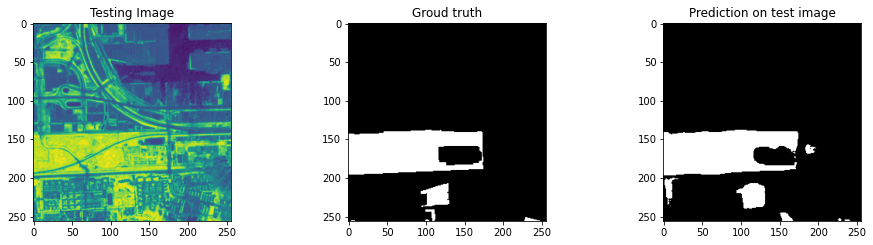

In [32]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth = y_test[test_img_number]
test_img_input = np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > threshold).astype(np.uint8)
#prediction = model.predict(test_img_input)[0,:,:,0]
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:, :, 2])

plt.subplot(232)
plt.title('Groud truth')
plt.imshow(ground_truth[:,:,0], cmap='gray')

plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

test on Philedelphia in different script